# Cardio Good Fitness
 Cardio Good Fitness is a retail store and this data is  of customers who brought various treadmill models.
 

Here are my other notebooks....Do checkout if you find my work helpful, happy learning.

1.[Predicting If Customer will borrow Personal Loan ](http://www.kaggle.com/yogidsba/personal-loan-logistic-regression-decision-tree)

2.[Predict Prices of Used cars](https://www.kaggle.com/yogidsba/predict-used-car-prices-linearregression)

3.[Insurance Claim Hypothesis Testing](http://www.kaggle.com/yogidsba/insurance-claims-eda-hypothesis-testing)

4.[Basic EDA on Covid vaccination](http://www.kaggle.com/yogidsba/basic-eda-on-covid-vaccination)

5.[Pandas Tutorial](http://www.kaggle.com/yogidsba/pandas-function-and-data-analysis)

6.[Diabetes Prediction](https://www.kaggle.com/yogidsba/diabetes-prediction-eda-model))

**Dataset Information** :


 cardiogoodfitness.csv: The csv contains data related to customers who have purchased different model from Cardio Good Fitness  :
- Product - the model no. of the treadmill
- Age - in no of years, of the customer
- Gender - of the customer
- Education - in no. of years, of the customer
- Marital Status - of the customer
- Usage - Avg. # times the customer wants to use the treadmill every week
- Fitness - Self rated fitness score of the customer (5 - very fit, 1 - very unfit)
- Income - of the customer
- Miles- expected to run

**Objective**
- Come up with a customer profile (characteristics of a customer) of the different products
- Based on the data we have to generate a set of insights and recommendations that will help the company in targetting new customers

 **Questions to be answered**
 
 - How many models does store have?
 - Which is most sold Model?
 - Are Male customers buying treadmill more than female customers?
 - What is the Income ,Age , Education of people buying treadmill.?
 - How many days and miles customer expect to run on treadmill?
 - What is the self rated fitness of customers buying treadmill.?
 - Are married customer buying Treadmill more than Single customers?
 - Is there any relation between Income and model.?
 - Is there any relation between Age and model ?
 - Is there any relation between self rated fitness and model .?
 - Is there any relation between education and model.?
 - Does gender has any effect on model customer buy .?
 - Does Martial status has any effect model customer buy.? 
 - Is there different age groups buying different models.?
 - Relation between Age, Income and education and model bought ?
 

In [44]:
#Cardio Good Fitness Project
#Project 1- Python- Foundations
#Date 15 February 2021

 ### Import  necessary packages

In [45]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # To supress warnings
sns.set(style="whitegrid") # set the background for the graphs

In [46]:
#Reading the csv file cardiogoodfitness.csv in variable 
data=pd.read_csv("CardioGoodFitness.csv")
dffitness=data.copy()

In [47]:
#Examine the data by looking at the first 5 rows of the data
dffitness.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [48]:
dffitness.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120
179,TM798,48,Male,18,Partnered,4,5,95508,180


In [49]:
#get the size of dataframe
dffitness.shape

(180, 9)

 **Observation:**There are 180 rows and 9 columns in the dataset

In [50]:
#get the type of data in dataframe
dffitness.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

 **Observation:**
 - Product,Gender and Martial status are string datatype .
 - While Age, Education,Usage,Fitness,Income,Miles are integer datatype.

In [51]:
dffitness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB



# Data Preprocessing

In [52]:
#changing it to  object dtype to category  to save memory
dffitness.Product=dffitness["Product"].astype("category")
dffitness.Gender=dffitness["Gender"].astype("category")
dffitness.MaritalStatus=dffitness["MaritalStatus"].astype("category")


In [53]:
dffitness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.5 KB


In [54]:
#What are the different column name?
dffitness.columns


Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [55]:
# Are there any missing values?
dffitness.isnull().sum()


Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [56]:
#Are there any duplicate values?
dffitness.duplicated().sum()

0

 **Observation:** There are no missing  or duplicate values in the dataset

# Examine  Data

In [57]:
#This is to look at what all unique values have . Just trying to use python
list_col=['Product','MaritalStatus','Usage','Fitness','Education','Age']
#How many models we have?
#what is Martial status of customers?
# how many days people expect to use treadmill?
# what is self rated fitness of customers buying treadmill?
# what is eductaion of customer buying treadmill?
# what is eductaion of customer buying treadmill?
for col in list_col: 
    print('{} :{} ' . format(col.upper(),dffitness[col].unique()))
    
   

PRODUCT :['TM195', 'TM498', 'TM798']
Categories (3, object): ['TM195', 'TM498', 'TM798'] 
MARITALSTATUS :['Single', 'Partnered']
Categories (2, object): ['Partnered', 'Single'] 
USAGE :[3 2 4 5 6 7] 
FITNESS :[4 3 2 1 5] 
EDUCATION :[14 15 12 13 16 18 20 21] 
AGE :[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 43 44 46 47 50 45 48 42] 


 **Observation:** 
 - There are 3 different treadmills products.
 - There are both Partnered and single customers
 - Age of customers ranges from 18 to 50
 - Education in years is from 12 -21
 - Usage is from 2 days to 7 days a week
 - Fitness level of customers from 1 -5

In [58]:
dffitness.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


**Observation:** 
-  Age of customer using treadmill is between range 18 - 50 . Average age is 28.78 and median is 26.
- Maximum income of treadmill user is 100K ,  Average income approx. 54K ,while median is is approx. 51K.
- Expected Treadmill  usage is atleast Once a week , maximum is 7 times a week and on Average 3 times a week
- Customer  education is between 12 -21 years, with average and median of 16 years and maximum of 21 years
- Customer expects to runs on an average of 103.19 miles per week, median 94 miles per week.
- Average self rated fitness is 3.

In [59]:
#Which is most sold Model?
dffitness.Product.value_counts()


TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64

**Observation:**  TM195 treadmill model is most sold model.

In [60]:
#Are Male customers buying treadmill more than female customers?
dffitness.Gender.value_counts()


Male      104
Female     76
Name: Gender, dtype: int64

**Observation:** There are 76 female  and 104 males customers. More Male customers are buying treadmill compared to female customer

In [61]:
#Are married customer buying Treadmill more than Single customers?
dffitness.MaritalStatus.value_counts()   

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

**Observation:** There are 107 Partnered  and 73 single customers. Customers who are Partnered are buying treadmill more compared to single customer.

In [62]:
dffitness[dffitness['Product'] == 'TM195'].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,80.0,28.5500,7.221452,18.0,23.0,26.0,33.0,50.0
Education,80.0,15.0375,1.216383,12.0,14.0,16.0,16.0,18.0
Usage,80.0,3.0875,0.782624,2.0,3.0,3.0,4.0,5.0
Fitness,80.0,2.9625,0.664540,1.0,3.0,3.0,3.0,5.0
Income,80.0,46418.0250,9075.783190,29562.0,38658.0,46617.0,53439.0,68220.0
Miles,80.0,82.7875,28.874102,38.0,66.0,85.0,94.0,188.0


**Observation**
- 80 customers bought TM195 model 
- Average age of customer who purchases TM195 is 28.5 , Median is 26 . Data is right skewed.
- Average Education is 15 and median is 16. 
- Expected usage is 3 day a week
- Expected Miles to run is on an Average 82.78 miles per week and median is 85.
- Self rated fitness is 3 that is average fitness level
- Average income and median is around $46K. 

In [63]:
dffitness[dffitness['Product'] == 'TM498'].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,60.0,28.900000,6.645248,19.0,24.0,26.0,33.25,48.0
Education,60.0,15.116667,1.222552,12.0,14.0,16.0,16.00,18.0
Usage,60.0,3.066667,0.799717,2.0,3.0,3.0,3.25,5.0
Fitness,60.0,2.900000,0.629770,1.0,3.0,3.0,3.00,4.0
Income,60.0,48973.650000,8653.989388,31836.0,44911.5,49459.5,53439.00,67083.0
Miles,60.0,87.933333,33.263135,21.0,64.0,85.0,106.00,212.0


**Observations
- There are 60 customers who purchased TM 498 Model 
- Average age of customer who purchases TM498 is 28.9 , Median is 26 . Age is right skewed. Customer range is between 24-33.
- Average Education is 15 and median is 16.
- Expected usage is 3 day a week
- Expected Miles to run is on an Average 60 miles per week and median is 85.
- Average Income is 48973.  
- Median  Income is 49459
- 

In [64]:
dffitness[dffitness['Product'] == 'TM798'].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,40.0,29.100,6.971738,22.0,24.75,27.0,30.25,48.0
Education,40.0,17.325,1.639066,14.0,16.00,18.0,18.00,21.0
Usage,40.0,4.775,0.946993,3.0,4.00,5.0,5.00,7.0
Fitness,40.0,4.625,0.667467,3.0,4.00,5.0,5.00,5.0
Income,40.0,75441.575,18505.836720,48556.0,58204.75,76568.5,90886.00,104581.0
Miles,40.0,166.900,60.066544,80.0,120.00,160.0,200.00,360.0


**Observations**
- Average age of customer who purchases TM798 is 29 , Median is 27 . 
- Average Education is 17 and median is 18.
- Expected usage is 4-5 day a week
- Expected Miles to run is on an Average 166 miles per week and median is 160.
- Average Income is 75K and median is 76K

#  Let Visualize the Data and get more insights
**Univariate Analysis**


In [65]:
def dist_box_violin(data):
 # function plots a combined graph for univariate analysis of continous variable 
 #to check spread, central tendency , dispersion and outliers  
    Name=data.name.upper()
    fig, axes =plt.subplots(1,3,figsize=(17, 7))
    fig.suptitle("SPREAD OF DATA FOR "+ Name  , fontsize=18, fontweight='bold')
    sns.distplot(data,kde=False,color='Blue',ax=axes[0])
    axes[0].axvline(data.mean(), color='y', linestyle='--',linewidth=2)
    axes[0].axvline(data.median(), color='r', linestyle='dashed', linewidth=2)
    axes[0].axvline(data.mode()[0],color='g',linestyle='solid',linewidth=2)
    axes[0].legend({'Mean':data.mean(),'Median':data.median(),'Mode':data.mode()})
    sns.boxplot(x=data,showmeans=True, orient='h',color="purple",ax=axes[1])
    #just exploring violin plot
    sns.violinplot(data,ax=axes[2],showmeans=True)
      
     
    

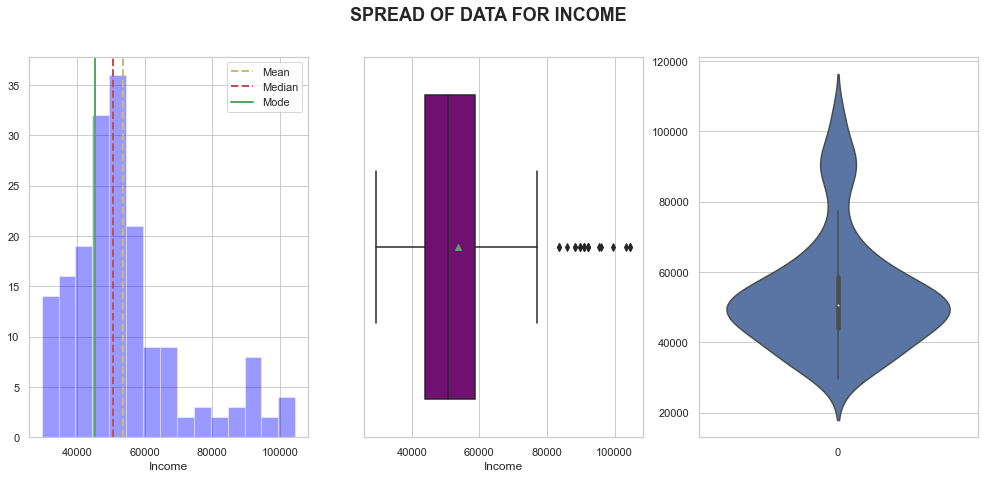

In [66]:
dist_box_violin(dffitness.Income)

**Observations:**
   - Income is skewed towards right , Median is 50K , Mean is 55k and mode is $45K. 
   - Most of the customers are in lower pay range  and earn less than 70K.
   - Income has some outliers. Few customers earn beyond 80K. 

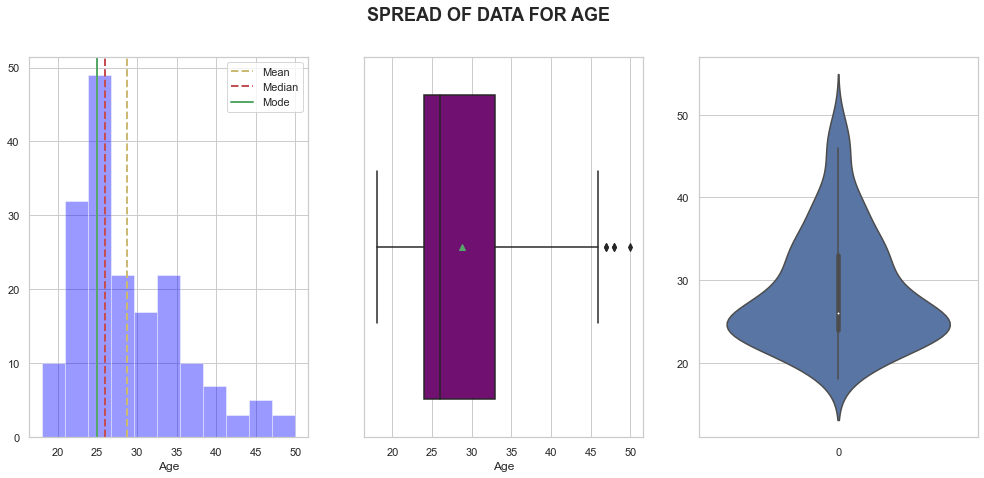

In [67]:
dist_box_violin(dffitness.Age)

**Observations:**
   - Age is skewed towards right.
   - Customers buying treadmill are younger and average age of customer is 28 , median is 26 and mode is 25  
   - Customers buying treadmill after age of 40  and before 20 are very less.
   

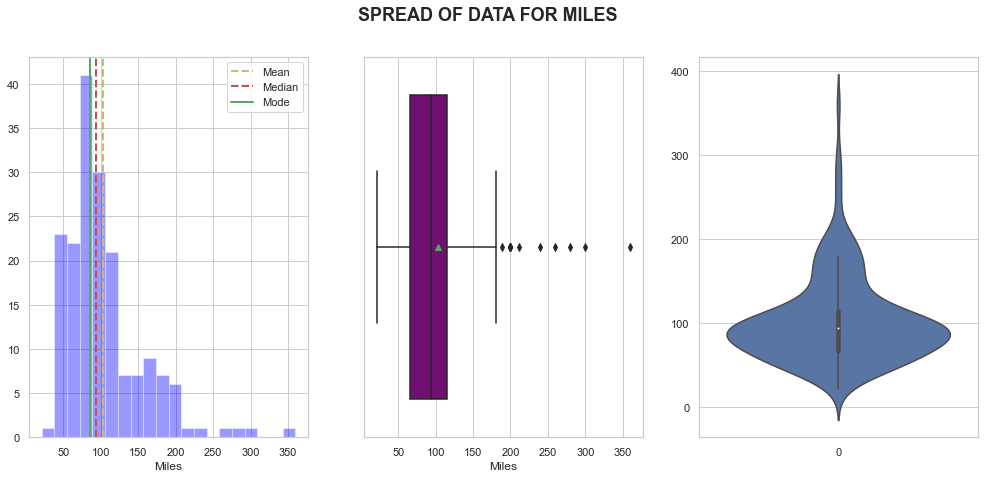

In [68]:
dist_box_violin(dffitness.Miles)

**Observations:**
   - Miles is skewed towards right.
   - Customers expect to run  on an average 80 miles per week.
   - There are some outliers, where customers are expecting to run more than 200 miles per weak.
   

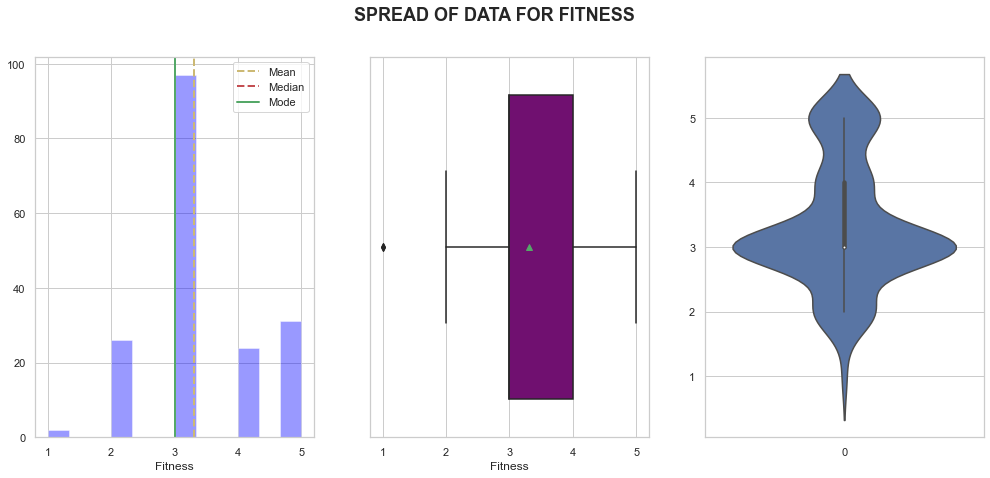

In [69]:
dist_box_violin(dffitness.Fitness)

**Observations**
   - Most of the customers have self-rated their fitness as 3( average).

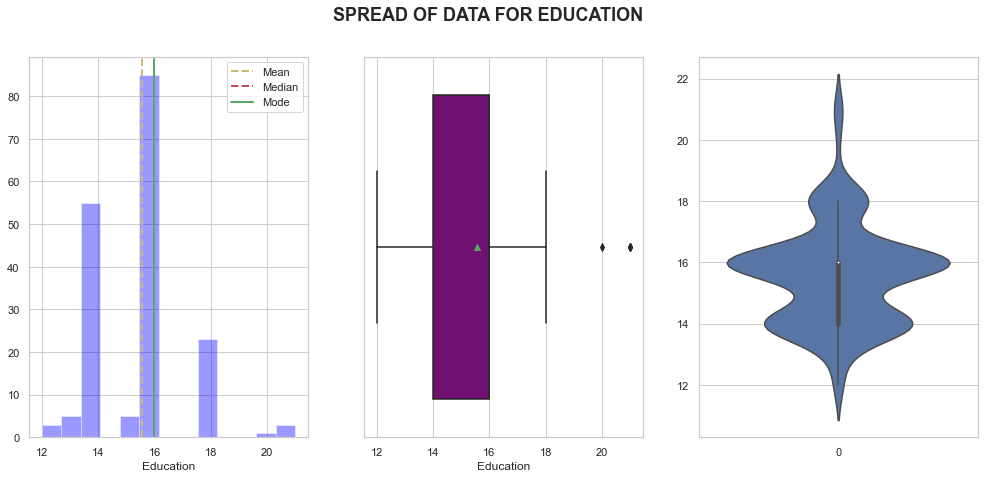

In [70]:
dist_box_violin(dffitness.Education)

**Observations**
- Most of the customers have 16 year of education (assuming them to be college graduates or bachelors).
- There are few outliers.
  

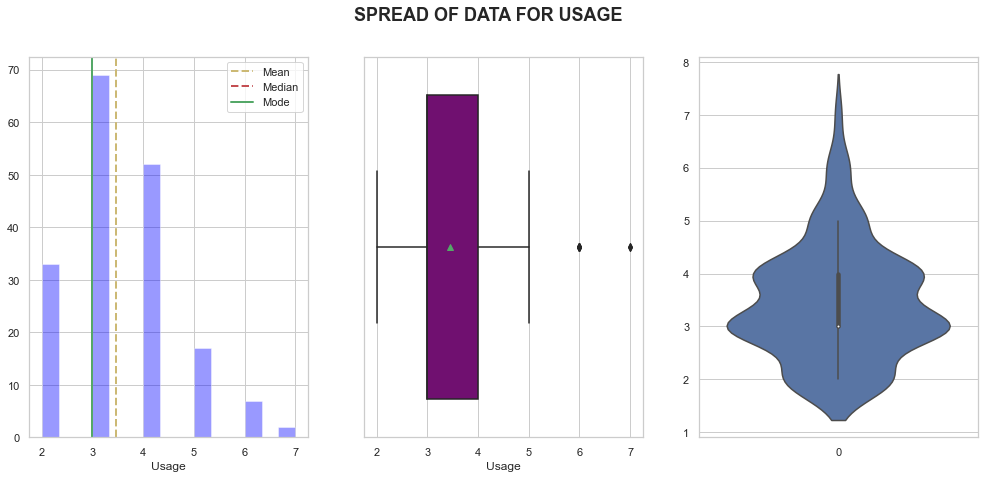

In [71]:
dist_box_violin(dffitness.Usage)

**Observations**
   - Most of customers expect they will be using the treadmill 3-4 days per week.
   - There are few  outliers where customer are expecting to use treadmill for 6 or 7 times a week
    

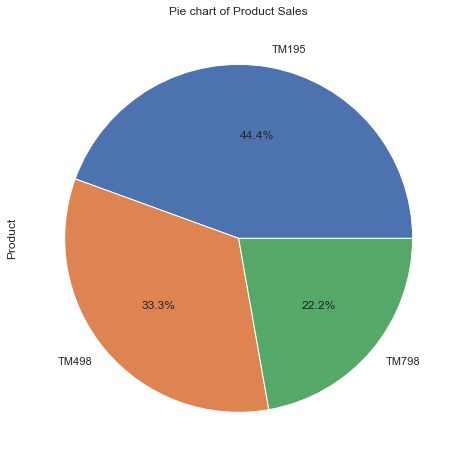

In [72]:
#Univariate Analysis
#categorical variables 
plt.figure(figsize=(14,7))
dffitness['Product'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(8,8))
plt.title("Pie chart of Product Sales")
plt.show()

In [73]:
# Function to create barplots that indicate percentage for each category.
def bar_perc(plot, feature):
    '''
    plot
    feature: 1-d categorical feature array
    '''
    total = len(feature) # length of the column
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        plot.annotate(percentage, (x, y), size = 12) # annotate the percentage
    

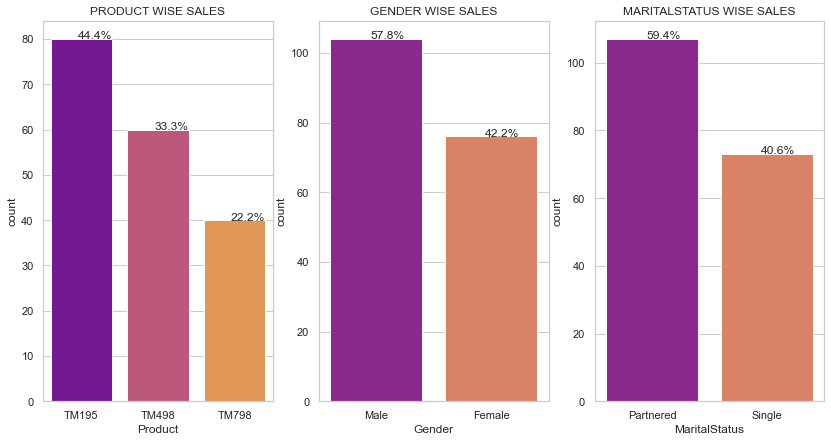

In [74]:
fig1, axes1 =plt.subplots(1,3,figsize=(14, 7))
list_col=['Product','Gender','MaritalStatus']
j=0
for i in range(len(list_col)):
    order = dffitness[list_col[i]].value_counts(ascending=False).index # to display bar in ascending order
    axis=sns.countplot(x=list_col[i], data=dffitness , order=order,ax=axes1[i],palette='plasma').set(title=list_col[i].upper() + ' WISE SALES')
    bar_perc(axes1[i],dffitness[list_col[i]])
    


#### **Observation:**
   - 44.4% customers brought TM195. TM195  model is the most  purchased model. TM498 was purchased more than TM798.
   - 57.8% male brought Treadmill.There are more Male customers  than Female customers.
   - 59.4% of the customers who purchased treadmill are Married.
   

# Bi variate Analysis

In [75]:
#Average age of customer buying each model
dffitness.groupby('Product')['Age'].mean()

Product
TM195    28.55
TM498    28.90
TM798    29.10
Name: Age, dtype: float64

In [76]:
#Average Income of customer buying each model
dffitness.groupby('Product')['Income'].mean()

Product
TM195    46418.025
TM498    48973.650
TM798    75441.575
Name: Income, dtype: float64

In [77]:
#Average Income of customer buying each model
dffitness.groupby('Product')['Miles'].mean()

Product
TM195     82.787500
TM498     87.933333
TM798    166.900000
Name: Miles, dtype: float64

Gender   Female  Male
Product              
TM195        40    40
TM498        29    31
TM798         7    33


Text(0.5, 1.0, 'PRODUCT BY GENDER')

<Figure size 720x720 with 0 Axes>

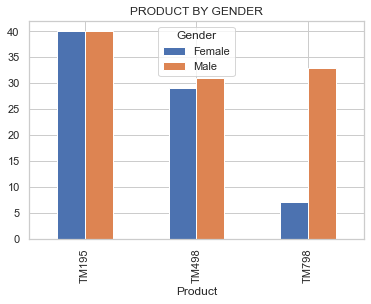

In [78]:
plt.figure(figsize=(10,10))
prd_gender=pd.crosstab(dffitness['Product'],dffitness['Gender'] )
print(prd_gender)

ax=prd_gender.plot(kind='bar')

plt.title("PRODUCT BY GENDER")


**Observation**
- TM195 model was equally bought my Male and Female
- Compared to females, male bought  TM498 model .
- TM798 model is popular in Males than in female.

MaritalStatus  Partnered  Single
Product                         
TM195                 48      32
TM498                 36      24
TM798                 23      17


Text(0.5, 1.0, 'PRODUCT BY MARTIAL STATUS')

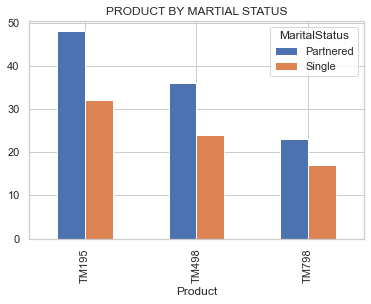

In [79]:
prd_mar_status=pd.crosstab(dffitness['Product'],dffitness['MaritalStatus'] )
print(prd_mar_status)
prd_mar_status.plot(kind='bar')
plt.title("PRODUCT BY MARTIAL STATUS")


<AxesSubplot:>

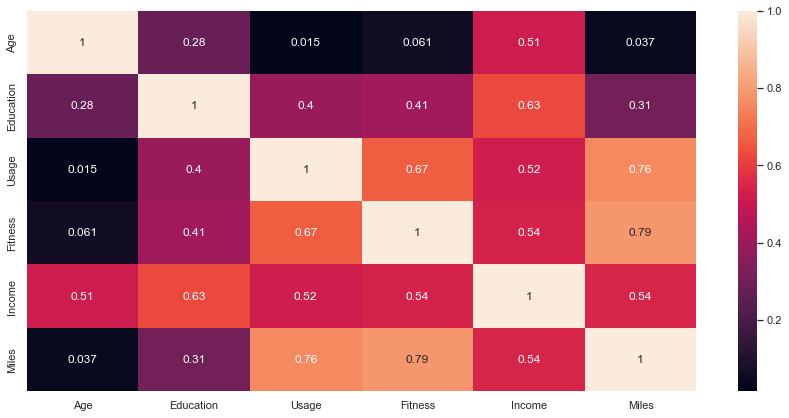

In [80]:
plt.figure(figsize=(15,7))
sns.heatmap(dffitness.corr(), annot=True) 

In [81]:
corr_pairs = dffitness.corr().unstack() # give pairs of correlation
print( corr_pairs[abs(corr_pairs)>0.5]) # Gives us correlated data


Age        Age          1.000000
           Income       0.513414
Education  Education    1.000000
           Income       0.625827
Usage      Usage        1.000000
           Fitness      0.668606
           Income       0.519537
           Miles        0.759130
Fitness    Usage        0.668606
           Fitness      1.000000
           Income       0.535005
           Miles        0.785702
Income     Age          0.513414
           Education    0.625827
           Usage        0.519537
           Fitness      0.535005
           Income       1.000000
           Miles        0.543473
Miles      Usage        0.759130
           Fitness      0.785702
           Income       0.543473
           Miles        1.000000
dtype: float64


**Observation**
- Age and Income has some  in significant correlation
- Education and Income has very little correlation
- There is some corelation between Usage and Income
- Fitness and miles are corelated
- TM798 model is correlated to Education, Usage,Fitness, Income and Miles. 
- Miles and usage are positively correlated

<Figure size 1080x504 with 0 Axes>

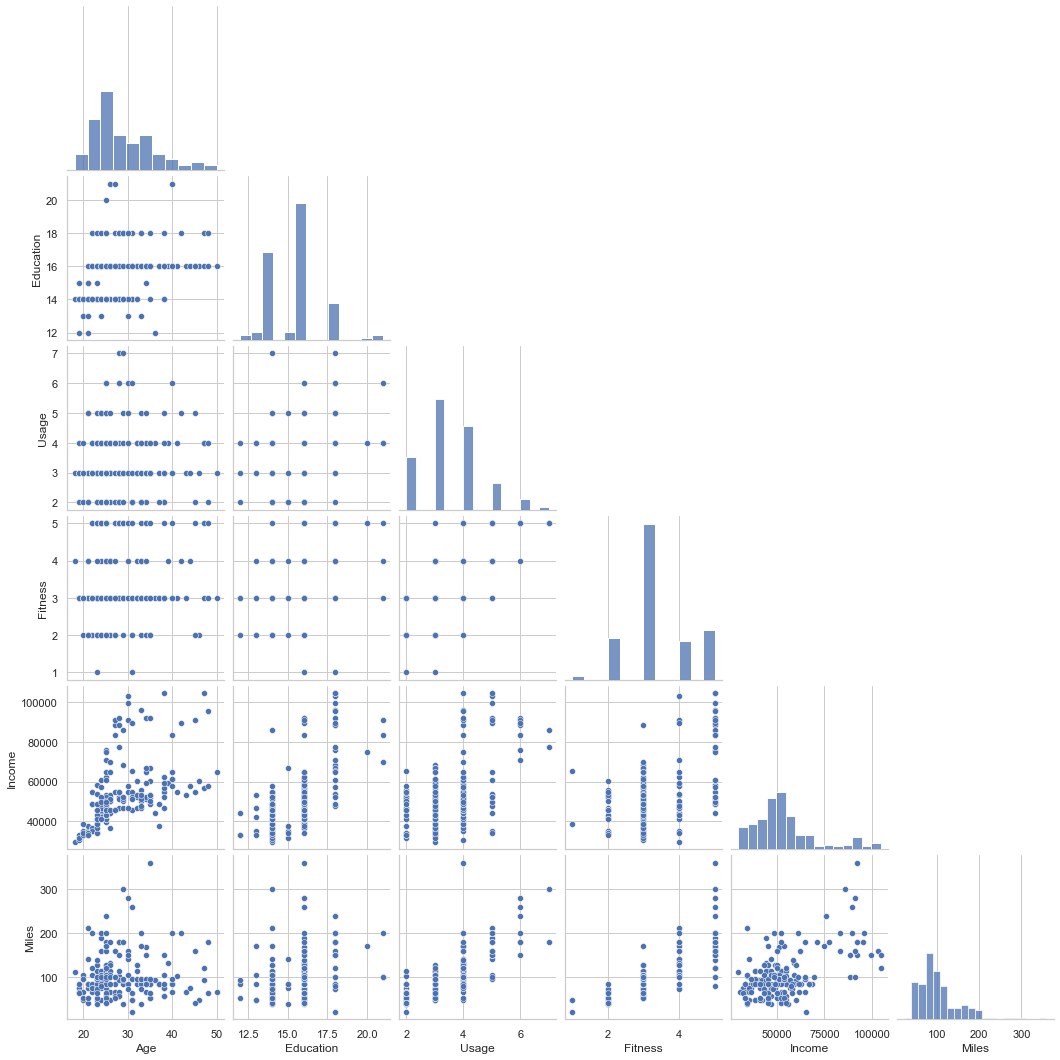

In [82]:
plt.figure(figsize=(15,7))
sns.pairplot(data=dffitness,corner=True)

**Observation:-**
 - we get the same observation as from the correlation plot

TypeError: boxplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

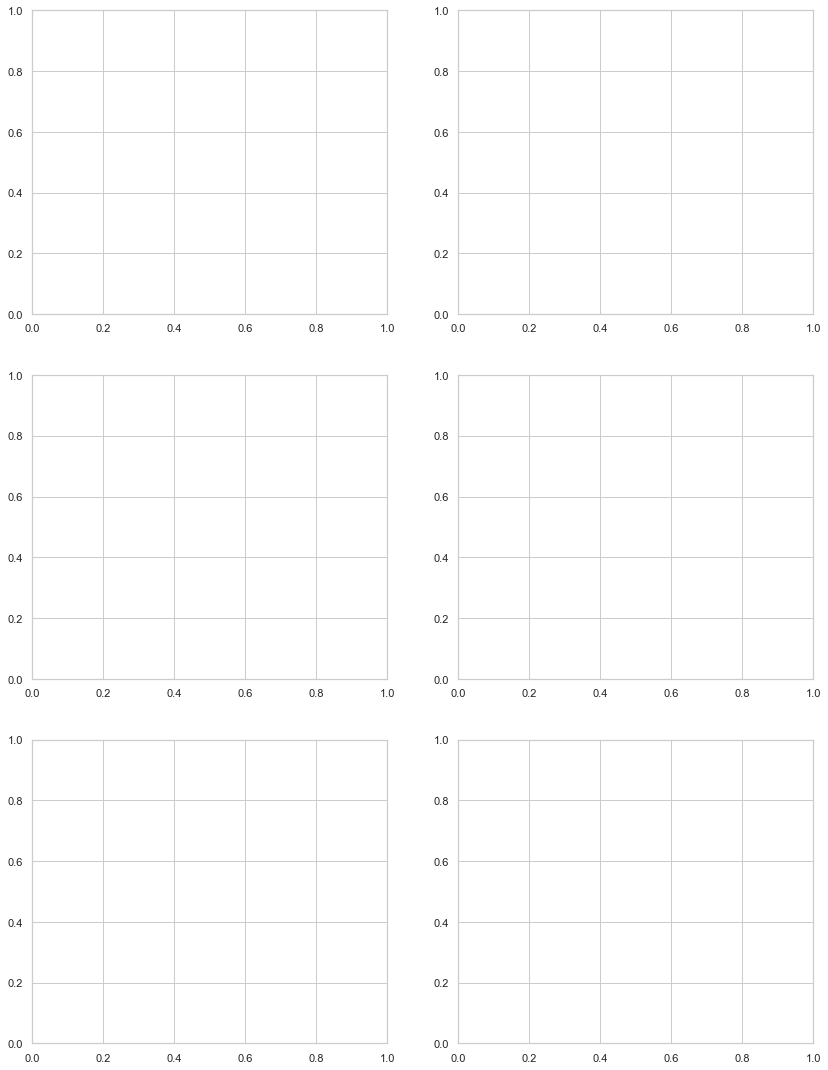

In [83]:
#Bi Varaite Analysis for 
#1.Product & Age
#2.Product & Income
#3.Product & Education
#4.Product & Usage
#5.Product & Fitness
#6.Product & Miles
fig1, axes1 =plt.subplots(3,2,figsize=(14, 19))
list1_col=['Age','Income','Education','Usage','Fitness','Miles']
#instead of writing  boxplot 6 times using for loop
for i in range(len(list1_col)):
    row=i//2
    col=i%2
    ax=axes1[row,col]
    
    sns.boxplot(dffitness[list1_col[i]],dffitness['Product'],ax=ax).set(title='PRODUCT BY ' + list1_col[i].upper()  )
    
    

**Observations:-**
 - There are many outliers for TM798 ,customers are more than age of 40 .
 - Age of customers buying TM195 and TM498 is between 20-35, where as customers buying TM798 are primarily in 25-30 
 - Customers with higher income and more education have purchased TM798 model.
 - Customers with lower income  purchase TM195 and TM498 model may be because of cost of the Treadmill
 - Customer with TM 195 expect to use treadmill  3-4 times a week and have 
   average self rated fitness as 3 and some unfits.
 - Customers who bought TM498 model expecting to use Treadmill less frequently but to run more miles a week.
 - Customer buying TM798 plan to use it more frequently , run more miles and have high self rated fitness .They seem to be more health conscious or professionals.
 - TM 798 model was purchased more by males customer than female customers .
 -  More partnered customer tend to buy TM798 than Single customers

TypeError: boxplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

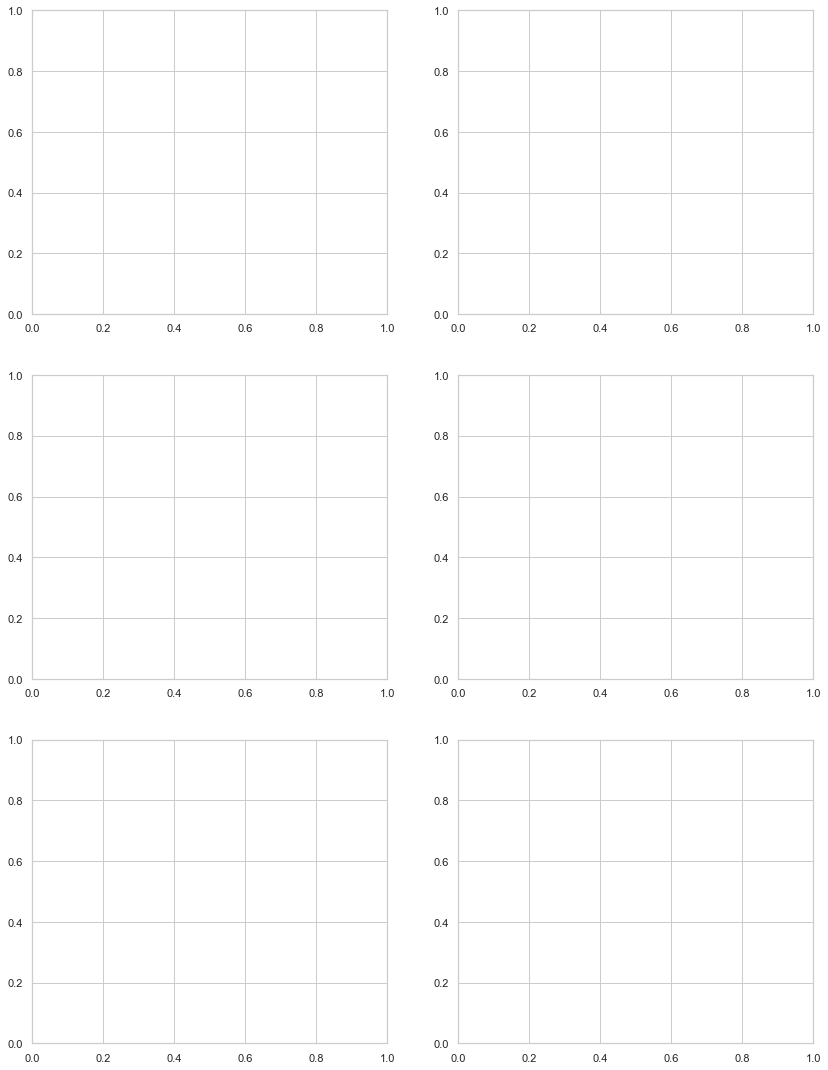

In [ ]:
#Bi Varaite Analysis for 
#1.Gender & Age
#2.Gender & Income
#3.Gender & Education
#4.Gender & Usage
#5.Gender & Fitness
#6.Gender & Miles

fig1, axes1 =plt.subplots(3,2,figsize=(14, 19))
list1_col=['Age','Income','Education','Usage','Fitness','Miles']
# to plot graph side by side.
for i in range(len(list1_col)):
    row=i//2
    col=i%2
    ax=axes1[row,col]
    sns.boxplot(dffitness[list1_col[i]],dffitness['Gender'],ax=ax).set(title='GENDER BY ' + list1_col[i].upper()) 


**Observations:-**
   - Male customers earn more than Female customers.
   - Males Customer have higher self rated fitness than female.
   - Expected Usage and miles covered on  tread mill is less in Female customers than male customers.
   - Female in age range 23-33 purchased the treadmill.
   - Education of Male and Female customers is same.

In [ ]:
#Bi Varaite Analysis for 
#1.Martial Status & Age
#2.Martial Status & Income
#3.Martial Status & Education
#4.Martial Status & Usage
#5.Martial Status & Fitness
#6.Martial Status & Miles
plt.figure(figsize=(7,7))
fig1, axes1 =plt.subplots(3,2,figsize=(18, 19))
list1_col=['Age','Income','Education','Usage','Fitness','Miles']
for i in range(len(list1_col)):
    row=i//2
    col=i%2
    ax=axes1[row,col]
    sns.boxplot(dffitness[list1_col[i]],dffitness['MaritalStatus'],ax=ax).set(title='MARTIAL STATUS BY ' + list1_col[i].upper()) 

In [ ]:
plt.figure(figsize=(7,7))
sns.countplot(dffitness['Gender'],hue=dffitness["MaritalStatus"]).set(title='MARTIAL STATUS BY GENDER')

**Observations**
 - Partnered customer  expects to run more miles compared to single
 - Income of Partnered customer is more than income of single customer.
 - Age of Partnered customer is more than Age of single customer
 - There are  more single males buying Treadmill than single Females
 - Self rated Fitness of both Partnered and Single customer are same.
 - Education of both Partnered and Single customer is same

In [ ]:
#Bivariate Analysis Age & Education
sns.jointplot(x = 'Age',y = 'Education',data = dffitness,color="red",kind='hex')


**Observation:-**
   - Customer between age 20-40 have 14 -16 years of education
   

**Observation:-**
 
    

In [ ]:
plt.figure(figsize=(12,7))
sns.pointplot(x=dffitness["Education"],y=dffitness["Income"],hue=dffitness['Product']).set(title='EDUCATION  BY INCOME ') 


**Observation:-**
   - Education and Income are  correlated.
   - TM798 has higher income and higher education

# Multivariate Analysis

In [ ]:
plt.figure(figsize=(12,7))
sns.catplot(x='Usage', y='Income', col='Gender',hue='Product' ,kind="bar", data=dffitness) 


**Observations**
  - Male customer with higher income ,bought TM798 Model and expect to use treadmill 4-6 /week
  - Customer who bought TM195 and TM498 are in same income range and expect to use treadmill 3-4 /week

In [ ]:

prd_mar_gen= pd.crosstab(index=dffitness["Product"], 
                             columns=[dffitness["MaritalStatus"],
                                      dffitness["Gender"]] ,
                             )  
prd_mar_gen


In [ ]:
prd_mar_gen.plot(kind='bar',figsize=(10,7))

In [ ]:
# Income by gender by product and by marital status
sns.catplot(x='Gender',y='Income', hue='Product', col='MaritalStatus', data=dffitness,kind='bar');

**Observations**
 - Partnered Female bought TM195 Model compared to Partnered male.
 - Single Female customers bought TM498 model more than Single male customers.
 - Partnered Male customers bought TM798 model more than Single Male customers.
 - There are  more single males buying Treadmill than single Females.
 - Single Male customers bought TM195 Model compared to Single Female.
 - Majority of people who buy the TM798 are man & partnered.
 - The majority of our buyers are man.

In [ ]:
prod_gen_fit=pd.crosstab(index=dffitness['Product'],columns=[dffitness['Gender'],dffitness['Fitness']])
prod_gen_fit

In [ ]:
#scatter plot between income, age ,product and usage
sns.relplot(x="Age", y="Income", hue="Product", size="Usage",
            sizes=(40, 400), alpha=.5, palette="plasma",
            height=6, data=data).set(title='INCOME BY AGE ,PRODUCT AND USAGE');

**Observations**:
 - Products TM195 and TM498 are bought by people with lower than 70K as income and age is concentrated more in  range of 23-35
 - Product TM798 is mainly bought by people with higher than 70K income and age falls in range of 23-30.
 -Majority of people who buys the TM798 expect that they will run more than consumers of the other two products, on average.

# Conclusion
## Important Observations
- 44.4% customers brought TM195. TM195 model is the most purchased model. TM498 was purchased more than TM798.
- 57.8% male brought Treadmill. There are more Male customers than Female customers.
- 59.4% of the customers who purchased treadmill are partnered.
- Average Usage of Males is more than Average usage of Females.
- Customers buying treadmill are younger and average age of customer is 28, median is 26 and mode is 25  
- Most of the customers are in lower pay range and earn less than 70K.   
- Average Education is 16 and median is 18.

## Customer Profiles of Models
##### <span style="color:blue"> </span>
**TM195**
-  44.4% customers brought TM195. Making it most popular model.
-  Average customer income is 46K
-  Customers who bought this treadmill have income less than 60k with an average of 55K.
-  There are same numbers of Male and Female customers
-  Average age of customer who purchases TM195 is 28.5, Median is 26.
-  Average years of Education of customers is 15, and median is 16 assuming it to be bachelors.
-  Self rate fitness level of customer is average.
-  They expect to use treadmill 3-4 times a week.
   
   Our 44.4% sale has come from this model. Majority of people whose income is around 55K has purchased this model assuming it’s because of its appealing price and affordability. Equal amount of males and females bought this model suggesting this model is not gender specfic. Majority of the customers who purchased this model are Partnered Females and Single Males compared to Single females and Partnered male. This may be cause of the features this treadmill provides and the cost of treadmill. Customers who bought this treadmill believe there fitness is average, and might be looking for a basic treadmill that does the job.

**TM498**
- This Model is sold more than TM798 model
- Average Income of the customer is 48,973
- Customers with lower income purchase TM195 and TM498 model may be because of cost of the Treadmill
- Average age of customer who purchases TM498 is 28.9 , Median is 26 . Customer range is between 24-33.
- Average years of Education of customers is 16 assuming it to be bachelor's

   Sale was 33%.This was the 2nd most sold model. The income of this group is almost same as TM195 model.  TM498 model expecting to use Treadmill less frequently but to run more miles a week.Single Female customers bought TM498 model more than Single male customers, may be cause of some feature difference.

**TM798**
- Average age of customer who purchases TM798 is 29 , Median is 27 . There are some outliers , suggesting we need explore more  closely customers who are above 40  for any possibility of new customers. 
- Average Education is 17 and median is 18, suggest they have some advanced education
- Expected usage is 4-5 day a week
- Expected Miles to run is on an Average 166 miles per week and median is 160.
- Average Income is 75K and median is 76K
- Product made only 22 % of sales.

  This treadmill seems to be more popular with customer having high income and Partnered Male customer .This may be more costlier compared to other two models. Treadmill may have some advanced features and people with high income are ready to spend more money  to buy this model.Male customers who are more serious about fitness or Professionals buy  this model.Customer's self rated fitness is between 3 -5 and expected usage is more than 4 days, suggest they  have  been working out  and  might be looking for a upgrade from there existing treadmill model.
  
## Recommendations:
 - TM195 & TM498 attracts people with income less than 60k , may be because of cost of both models. We should  market these models  as a budget Treadmill for all.
 - TM798 should be marketed as a high end Treadmill for professionals and athletes. Create a luxiurous brand image for this  Treadmill.
 - Assuming TM 798 provides high margin of profit, we should brand it as Treadmill for athletes. We can also endorse some athlete to promote this Treadmill. This might increase there sales.
 - Considering above observations, We can attract customers to upgrade from their existing treadmill and switch to TM798 ,highlighting extra features this Treadmill provides.
 - To expand  our sales with Female customers, We could  run a marketing campaign during Women's days, Mothers days emphasizing on fitness and exercise. 
 - The age of our customers are in the range of 35 years old and 18 years old. We need to research if there is any scope to increase sale with customers who are more than 35 years old.
